<center>
    <img src='images/logo.png' width='400px'>
    <h1>MÔN HỌC: THỊ GIÁC MÁY TÍNH (7080518)</h1>
<h2> Chương 2: XỬ LÝ VÀ NÂNG CAO CHẤT LƯỢNG ẢNH - Phần 1</h2>
</center>

---
Xử lý ảnh (Image processing): là quá trình tạo ra ảnh mới từ ảnh có sẵn, VD: tăng độ sáng, cắt ảnh, khử nhiễu,… không tập trung vào việc hiểu nội dung của bức ảnh.

**Nội dung bài học - phần 1:**

**I. Một số kỹ thuật xử lý ảnh cơ bản:**
1. Thay đổi kích thước ảnh (Resizing images)
2. Cắt ảnh (Cropping images)
3. Xoay ảnh (Rotate images)
4. Lật ảnh (Flip images)
---
*Copyright @dangvannam.FIT.HUMG*

In [2]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('Version OpenCV:', cv2.__version__)

#--------------------------------
import warnings
warnings.filterwarnings("ignore")

Version OpenCV: 4.9.0


### 1.1 Thay đổi kích thước ảnh (Resizing images)
---
* Thay đổi kích thước (Zoom in, Zoom out) là một trong những kỹ thuật xử lý ảnh thông dụng.
* Ảnh có kích thước lớn sẽ chiếm nhiều bộ nhớ, số lượng tập dữ liệu ảnh thường rất lớn. Do đó cần giảm kích thước ảnh. Resize là một kỹ thuật phổ biến. => Trong OpenCV, Sử dụng hàm cv2.resize

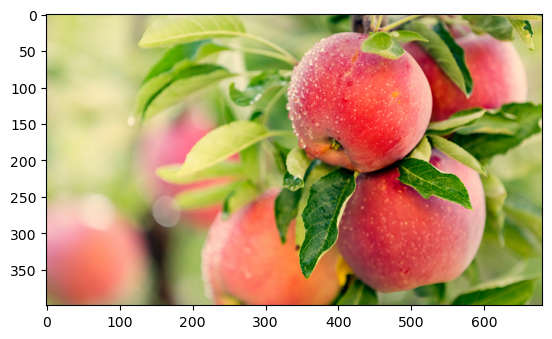

In [3]:
#Đọc ảnh:
img_orignal = cv2.imread('images/apples.jpg',1)

#Chuyển sang hệ màu RGB để hiện thị:
img_orignal = cv2.cvtColor(img_orignal,cv2.COLOR_BGR2RGB)

#Hiển thị ảnh gốc:
plt.imshow(img_orignal)
plt.show()

In [4]:
#Lấy kích thước ảnh ban đầu:
h = img_orignal.shape[0]
w = img_orignal.shape[1]
print('Độ phân giải ảnh ban đầu:',h,'x',w)

Độ phân giải ảnh ban đầu: 399 x 680


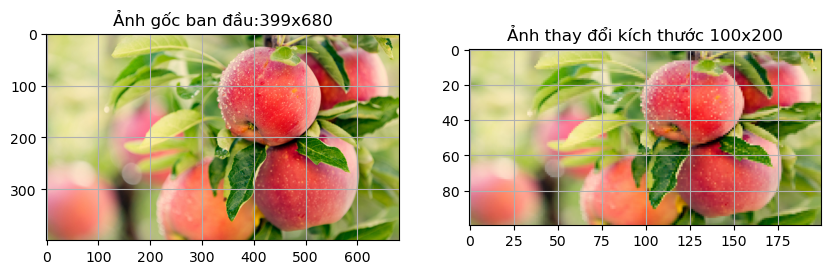

In [5]:
#Thay đổi kích thước ảnh về độ phân giải: 100 x 200
dsize = (200,100) #Lưu ý thứ tự (Width, Height)

#Sử dụng phương thức resize():
img_100x200 = cv2.resize(img_orignal,
                         dsize, 
                         interpolation=cv2.INTER_LINEAR) 

#Hiển thị ảnh gốc và ảnh thay đổi kích thước
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.imshow(img_orignal)
st = 'Ảnh gốc ban đầu:' + str(h) +  'x' + str(w)
plt.title(st)
plt.grid()

plt.subplot(1, 2, 2)
plt.imshow(img_100x200)
plt.title('Ảnh thay đổi kích thước 100x200')
plt.grid()

plt.show()

In [6]:
#Lưu ảnh sau resize:
cv2.imwrite('images/Apples_100x200.jpg',
            cv2.cvtColor(img_100x200,cv2.COLOR_RGB2BGR))

True

## Các tham số của phương thức resize:
---

**cv2.resize(src, dsize, interpolation)**

Ý nghĩa các tham số:

1. src: ảnh gốc cần thay đổi kích thước.
2. dsize (width, height): Kích thước ảnh muốn thay đổi
3. interpolation: chỉ định thuật toán thực hiện resize:
* INTER_NEAREST – nội suy láng giềng gần nhất
* INTER_LINEAR – nội suy song tuyến tính (mặc định)
* INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
* INTER_CUBIC –  nội suy xoắn bậc 3, trên  4×4 pixel láng giềng
* INTER_LANCZOS4 –  nội suy Lanczos trên 8×8 pixel láng giềng!




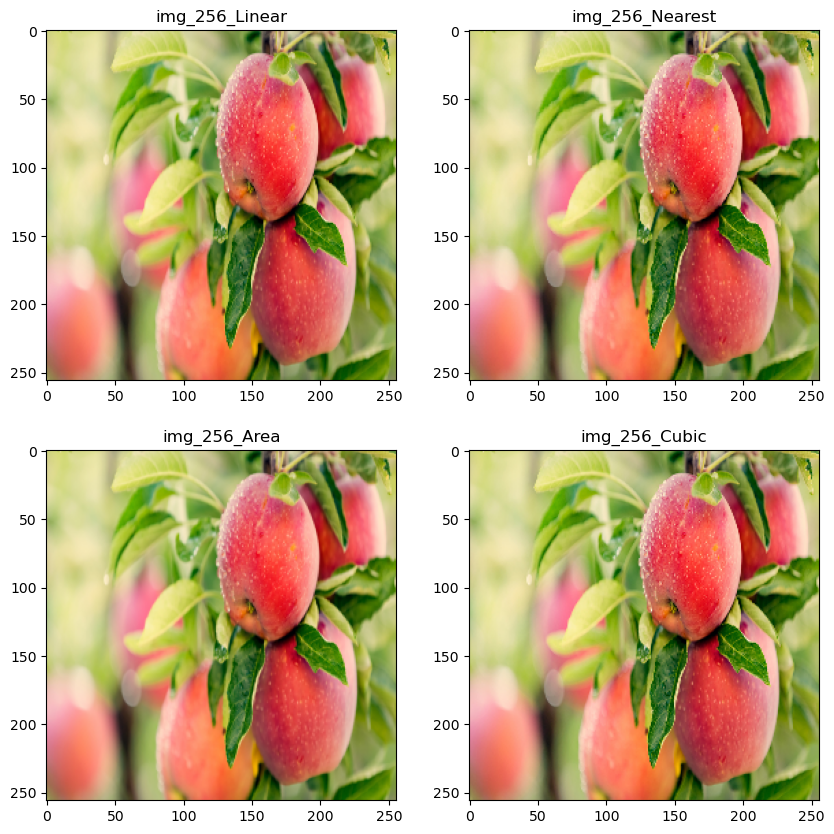

In [7]:
#Resize ảnh với các thuật toán khác nhau:
dsize = (256,256)

#INTER_LINEAR (thuật toán mặc định):
img_256_Linear = cv2.resize(img_orignal,dsize,
                            interpolation=cv2.INTER_LINEAR)

#INTER_NEAREST:
img_256_Nearest = cv2.resize(img_orignal,dsize,
                             interpolation=cv2.INTER_NEAREST)

#INTER_AREA:
img_256_Area = cv2.resize(img_orignal, dsize,
                          interpolation=cv2.INTER_AREA)

#INTER_CUBIC
img_256_Cubic = cv2.resize(img_orignal,dsize,
                           interpolation=cv2.INTER_CUBIC)

#Hiển thị ảnh gốc và ảnh thay đổi kích thước với các thuật toán khác nhau
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(img_256_Linear)
plt.title('img_256_Linear')

plt.subplot(2, 2, 2)
plt.imshow(img_256_Nearest)
plt.title('img_256_Nearest')

plt.subplot(2, 2, 3)
plt.imshow(img_256_Area)
plt.title('img_256_Area')

plt.subplot(2, 2, 4)
plt.imshow(img_256_Cubic)
plt.title('img_256_Cubic')

plt.show()

**Thông thường:**
* cv.INTER_AREA để thu nhỏ
* cv.INTER_CUBIC & cv.INTER_LINEAR để zoom.

In [8]:
#Lấy kích thước ảnh ban đầu:
h = img_orignal.shape[0]
w = img_orignal.shape[1]
print('Độ phân giải ảnh ban đầu:',h,'x',w)

Độ phân giải ảnh ban đầu: 399 x 680


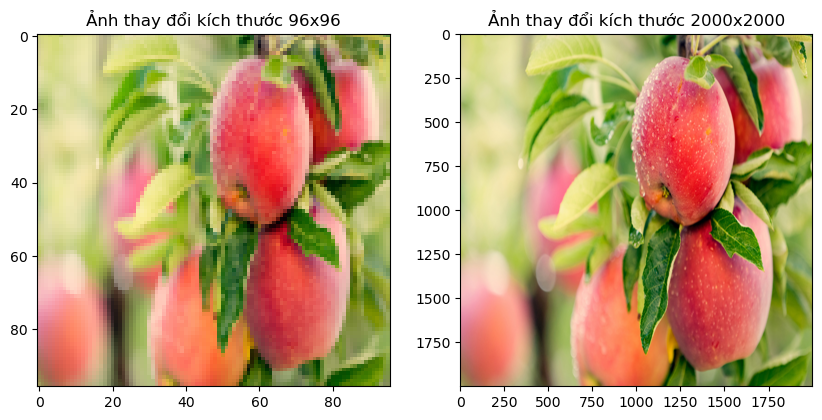

In [9]:
dzoom_in = (96,96)      #Thiết lập kích thước Thu nhỏ hình ảnh
dzoom_out = (2000,2000) #Thiết lập kích thước Phóng to hình ảnh

#Thu nhỏ:
img_96 = cv2.resize(img_orignal,
                    dzoom_in,
                    interpolation=cv2.INTER_AREA)

#Phóng phóng to:
img_2000 = cv2.resize(img_orignal,
                      dzoom_out,
                      interpolation=cv2.INTER_CUBIC)

#Lưu ảnh:
cv2.imwrite('images/Apples_96.jpg',cv2.cvtColor(img_96,cv2.COLOR_RGB2BGR))
cv2.imwrite('images/Apples_2000.jpg',cv2.cvtColor(img_2000,cv2.COLOR_RGB2BGR))

#Hiển thị kết quả
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img_96)
plt.title('Ảnh thay đổi kích thước 96x96')

plt.subplot(1, 2, 2)
plt.imshow(img_2000)
plt.title('Ảnh thay đổi kích thước 2000x2000')

plt.show()

In [10]:
print('Độ phân giải ảnh ban đầu:',h,'x',w)

Độ phân giải ảnh ban đầu: 399 x 680


In [11]:
#Thay đổi kích thước ảnh theo tỷ lệ % (scale) nhập vào: 
# Nếu scale <100 thu nhỏ 
# Nếu scale = 100 giữ nguyên
# Nếu scale>100 phóng to








## THỰC HÀNH 2.1: 
---
**Yêu cầu 1:** Sinh viên đọc ảnh màu images/Thuchanh_2_1.jpg và chuyển đổi sang hệ RGB, hiển thị ảnh

**Yêu cầu 2:** Cho biết chiều cao, chiều rộng và số pixel điểm ảnh.

**Yêu cầu 3:** Thực hiện thay đổi kích thước theo yêu cầu sau:

    3.1. Thay đổi kích thước ảnh về 32x32, sử dụng tham số interpolation mặc định. Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_31.jpg theo hệ màu BGR
    
    3.2. Giữ nguyên chiều cao của ảnh gốc, giảm chiều rộng ảnh đi một nửa, Sử dụng phương pháp INTER_NEAREST.Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_32.jpg theo hệ màu BGR
    
    3.3. Tăng chiều cao của ảnh lên gấp đôi, giữ nguyên chiều rộng của ảnh gốc; Sử dụng phương pháp INTER_LANCZOS4. Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_33.jpg theo hệ màu BGR

In [12]:
#{SINH VIÊN VIẾT CODE Ở ĐÂY:}
#1. Đọc ảnh và hiển thị ảnh:


In [13]:
#2. Chiều cao, chiều rộng và số pixel điểm ảnh:


In [14]:
#3. Thực hiện thay đổi kích thước theo yêu cầu sau:
#3.1. Thay đổi kích thước ảnh về 32x32, sử dụng tham số interpolation mặc định. 
# Hiển thị kết quả và Lưu lại ảnh vào thư mục Saves/MSV_img_1.jpg theo hệ màu BGR




In [15]:
#3.2. Giữ nguyên chiều cao của ảnh gốc, giảm chiều rộng ảnh đi một nửa, 
#Sử dụng phương pháp INTER_NEAREST.
#Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_2.jpg theo hệ màu BGR




In [16]:
#3.3 Tăng chiều cao của ảnh lên gấp đôi, giữ nguyên chiều rộng của ảnh gốc; 
#Sử dụng phương pháp INTER_LANCZOS4. 
#Hiển thị kết quả và Lưu lại ảnh vào thư mục images/Saves/MSV_img_3.jpg theo hệ màu BGR




## THỰC HÀNH 2.1 (Tiếp): 
---
Thay đổi kích thước nhiều ảnh:

**Yêu cầu 4:** Sinh viên sử dụng thư mục chứa các ảnh đã đổi tên thực hiện trong bài thực hành 1.3 chương 1. Thực hiện thay đổi kích thước toàn bộ ảnh về độ phân giải 96x96 pixel. Lưu lại ảnh đã thay đổi vào thư mục mới có tên Pic_96 và đặt lại tên ảnh như sau: Pic_96_i.jpg với i là các số thứ tự của ảnh.


In [17]:
# {SINH VIÊN VIẾT CODE VÀO ĐÂY}





## 2. Cắt ảnh (Cropping Images)
---
Thực hiện cắt một phần của ảnh, sử dụng phương pháp tách các phần tử trong ma trận:
* Ảnh nhị phân, ảnh xám --> Ma trận [hàng (chiều cao ảnh), côt (chiều rộng ảnh)]
* Ảnh màu ---> Mảng 3 chiều [hàng (chiều cao ảnh), côt (chiều rộng ảnh),màu (BGR)]

**img_cropped = img[start_row:end_row, start_col:end_col]**

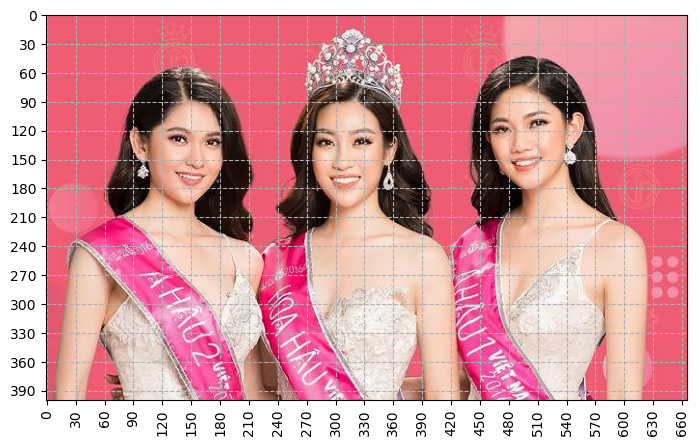

In [18]:
#Đọc ảnh màu:
img_miss = cv2.imread('images/MissVN.jpg')

#Chuyển sang hệ màu RGB để hiện thị:
img_miss = cv2.cvtColor(img_miss,cv2.COLOR_BGR2RGB)

#Tạo khoảng chia của lưới:
ax = np.arange(0,img_miss.shape[1],30) #Tạo các tick cho trục x
ay = np.arange(0,img_miss.shape[0],30) #Tạo các tick cho trục y

#Hiển thị ảnh:
plt.figure(figsize=(10,5))
plt.imshow(img_miss)
plt.xticks(ax, rotation=90)
plt.yticks(ay)
plt.grid(ls='--')
plt.show()

In [19]:
#Kích thước ảnh gốc:
print(img_miss.shape)

(400, 666, 3)


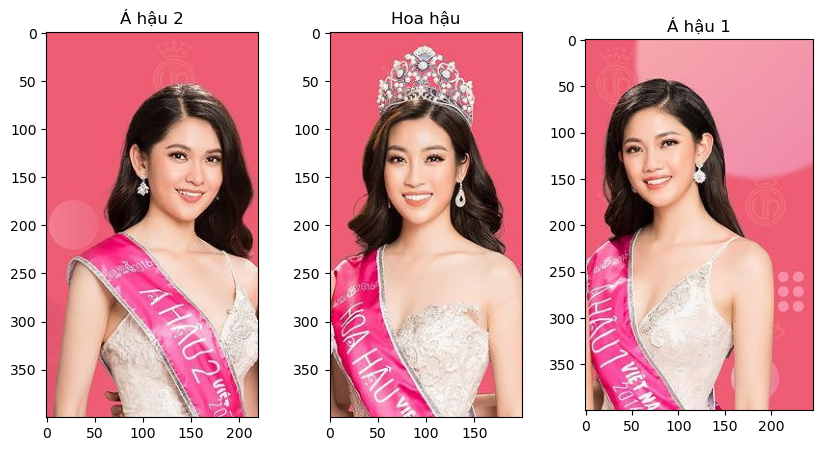

In [20]:
#Cắt lấy từng người trong ảnh gốc:
img_ahau2 = img_miss[:,0:220]
img_hoahau = img_miss[:,220:420]
img_ahau1 = img_miss[:,420:]

#Hiển thị kết quả:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(img_ahau2)
plt.title('Á hậu 2')

plt.subplot(1, 3, 2)
plt.imshow(img_hoahau)
plt.title('Hoa hậu')

plt.subplot(1, 3, 3)
plt.imshow(img_ahau1)
plt.title('Á hậu 1')

plt.show()

In [21]:
#Chỉ Cắt lấy khuôn mặt trong ảnh và hiển thị









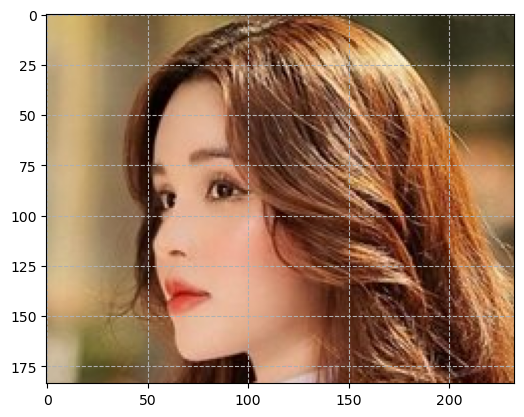

In [22]:
#CẮT ẢNH THEO MỘT VÙNG LỰA CHỌN BẰNG CHUỘT VỚI PHƯƠNG THỨC selectROI:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
  
#Đọc ảnh:
img_miss = cv2.imread('images/Pic_1.jpg')
  
# Select ROI: Lấy một vùng trong ảnh --> Toạ độ của vùng ảnh 
r = cv2.selectROI("select the area", img_miss)
  
#Cắt ảnh theo vùng được chọn
cropped_image = img_miss[int(r[1]):int(r[1]+r[3]), 
                      int(r[0]):int(r[0]+r[2])]
  
# Hiển thị ảnh đã cắt:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.grid(ls='--')
plt.show()

## THỰC HÀNH 2.2: 
---
Yêu cầu :
* Sinh viên đọc và hiển thị ảnh images/Thuchanh_2_2.jpg ở dạng ảnh xám.
* Cắt lấy từng con số và ký tự có trong ảnh, Hiển thị và lưu ảnh đã cắt vào thư mục images/Saves/ với tên tương ứng là MSV_kytutuongung.jpg
<img src = 'images/Thuchanh_2_2.jpg' width='300px'>

In [33]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY:}
#Đọc ảnh xám:



## 3. Xoay ảnh (Rotate Images)
---
OpenCV hỗ trợ phương thức xoay ảnh:
 **cv2.rotate(img, rotateCode)**
 
 Trong đó:
 1. img: ảnh gốc muốn xoay
 2. rotateCode: các chế độ xoay ảnh:
     * cv2.ROTATE_90_CLOCKWISE: Xoay 90 độ theo chiều kim đồng hồ
     * cv2.ROTATE_90_COUNTERCLOCKWISE: Xoay 90 độ ngược chiều kim đồng hồ
     * cv2.ROTATE_180: Xoay ảnh 180 (lật ảnh)

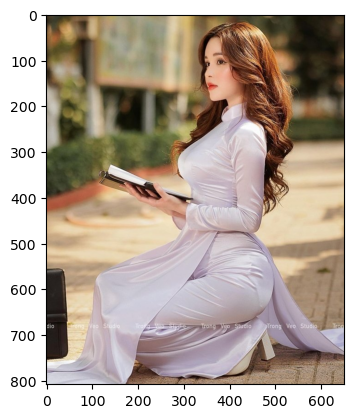

In [34]:
#Đọc ảnh màu:
img = cv2.imread('images/Pic_1.jpg')

#Chuyển sang hệ màu RGB để hiện thị:
img_miss = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Hiển thị ảnh:
plt.imshow(img_miss)
plt.show()

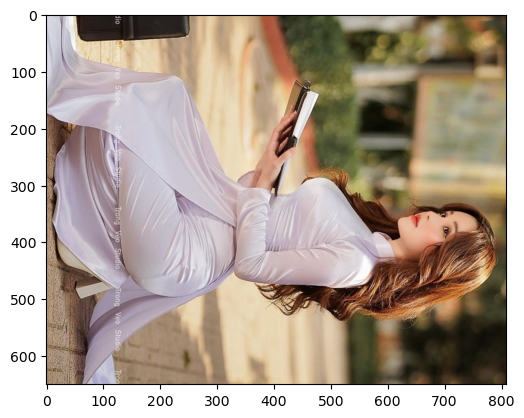

In [25]:
#Xoay ảnh 90 độ theo chiều kim đồng hồ:
img_rotate_90_clockwise = cv2.rotate(img_miss, 
                                     cv2.ROTATE_90_CLOCKWISE)
#Hiển thị ảnh đã xoay:
plt.imshow(img_rotate_90_clockwise)
plt.show()

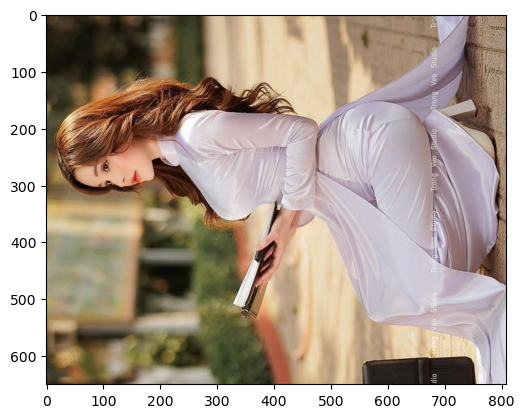

In [26]:
#Xoay ảnh 90 độ ngược chiều kim đồng hồ:
img_rotate_90_counterclockwise = cv2.rotate(img_miss, 
                                            cv2.ROTATE_90_COUNTERCLOCKWISE)

#Hiển thị ảnh đã xoay:
plt.imshow(img_rotate_90_counterclockwise)
plt.show()

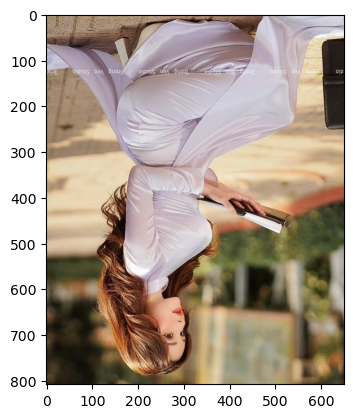

In [27]:
#Xoay ảnh 180 độ:
img_rotate_180 = cv2.rotate(img_miss, 
                            cv2.ROTATE_180)

#Hiển thị đã xoay:
plt.imshow(img_rotate_180)
plt.show()

## 4. Lật ảnh (Flip Images)
---
OpenCV hỗ trợ phương thức lật ảnh:
 **cv2.flip(img, flipCode)**
 
 Trong đó:
 1. img: ảnh gốc muốn xoay
 2. flipCode: các chế độ lật ảnh:
     * flipCode = 0: Lật ảnh theo chiều ngang
     * flipCode > 0: Lật ảnh theo chiều dọc
     * flipCode < 0: Lật ảnh theo chiều ngang và dọc

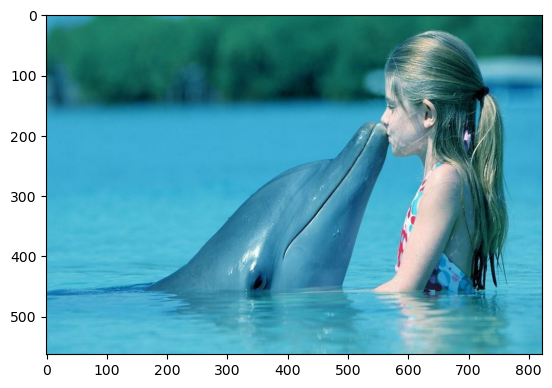

In [28]:
#Đọc ảnh màu:
img = cv2.imread('images/fish.jpg')

#Chuyển sang hệ màu RGB để hiện thị:
img_fish = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Hiển thị ảnh:
plt.imshow(img_fish)
plt.show()

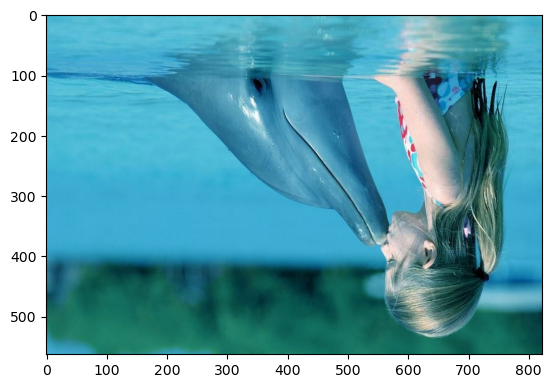

In [29]:
#Lật ảnh theo chiều ngang (trục X): flipCode = 0
img_flip_ud = cv2.flip(img_fish, 0)

#Hiển thị ảnh đã lật:
plt.imshow(img_flip_ud)
plt.show()

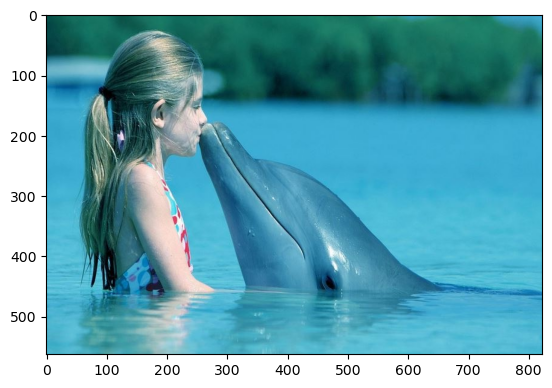

In [30]:
#Lật ảnh theo chiều dọc (trục Y): flipCode > 0
img_flip_lr = cv2.flip(img_fish, 1)

#Hiển thị ảnh đã lật:
plt.imshow(img_flip_lr)
plt.show()

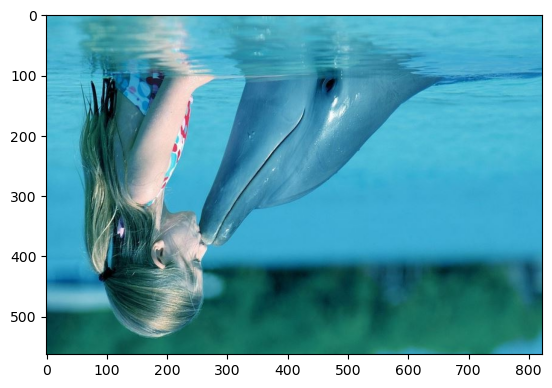

In [31]:
#Lật ảnh theo cả 2 chiều ngang, dọc (theo trục Y, X): flipCode < 0
img_flip_up_lr = cv2.flip(img_fish, -1)

#Hiển thị ảnh đã lật:
plt.imshow(img_flip_up_lr)
plt.show()

## THỰC HÀNH 2.3: 
---
Yêu cầu :
* Sinh viên đọc và hiển thị ảnh images/Thuchanh_2_3.jpg ở chế độ mặc định.
* Thực hiện xoay ảnh 90 độ thuận và ngược chiều kim đồng hồ.
* Thực hiện lật ảnh theo chiều ngang và dọc
* Hiển thị và lưu các ảnh đã xoay, lật vào thư mục images/Saves/
<img src = 'images/Thuchanh_2_3.jpg' width='300px'>

In [32]:
#{SINH VIÊN VIẾT CODE VÀO ĐÂY}
#Đọc ảnh

